# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
!pip install imbalanced-learn
!pip install imblearn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [3]:
df = pd.read_csv("Train.csv")  #  Reading the train and test data
df_test = pd.read_csv("Test.csv") 


In [4]:
# Checking the dimension (number of rows and columns) in the training data
df.shape  

(40000, 41)

The train dataset has 40,000 rows and 41 columns

In [5]:
# Checking the number of rows and columns in the test data
df_test.shape 

(10000, 41)

The test dataset has 10,000 rows and 41 columns

## Data Overview

In [6]:
# I'll create a copy of the training data
data = df.copy()

In [7]:
# I'll create a copy of the testing data
data_test = df_test.copy()

In [8]:
# Viewing the first 5 rows of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


In [9]:
# View the last 5 rows of the data
data.tail()  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


In [10]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

All 41 columns are of numerical data type (40 float and 1 int)
2 columns have less than 40,000 non-null values i.e. columns have missing values.  We'll explore this further.

In [11]:
# Checking for duplicate values in the data
data.duplicated().sum()  

0

There are no duplicate values in the train dataset

In [12]:
# Checking for missing values in the data
data.isnull().sum()  

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are 46 missing values in column V1 and 39 missing values in column V2 train data set. All other columns do not have missing data

In [13]:
# Checking for missing values in the data
data_test.isnull().sum()  

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are 11 missing values in column V1 and 7 missing values in column V2 test data set. All other columns do not have any missing data.

In [14]:
# Viewing the statistical summary of the numerical columns in the data
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


Over 75% of instances in the train data do not have failures 


## EDA

### Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

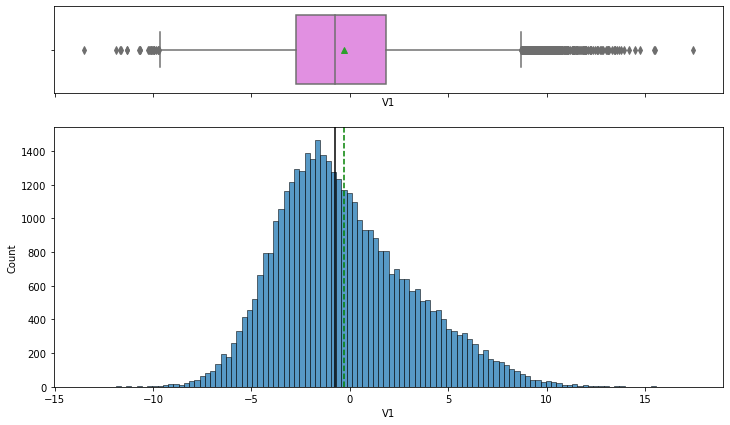

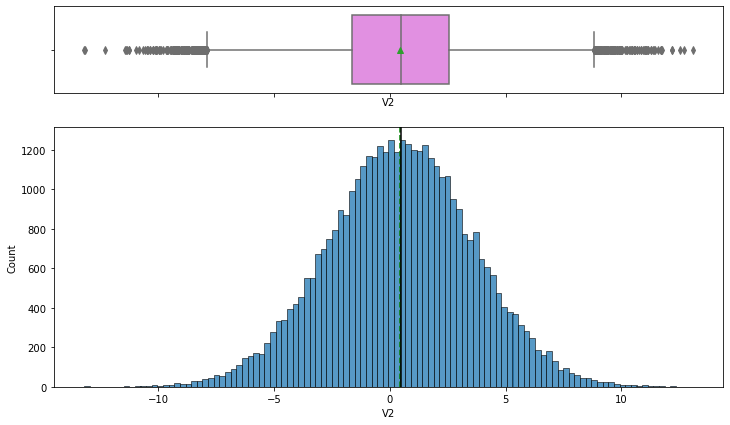

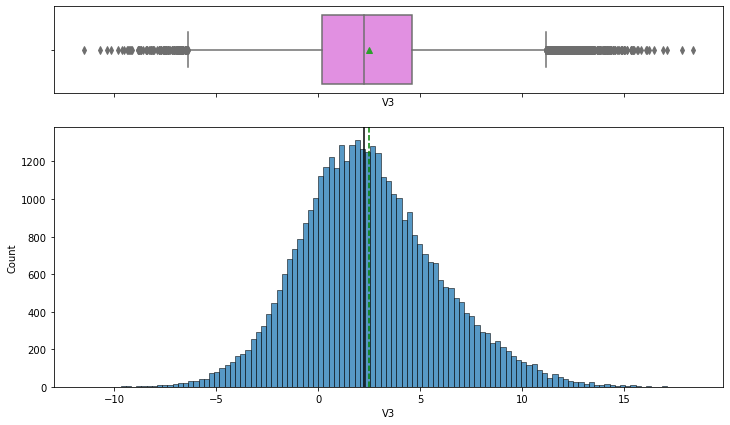

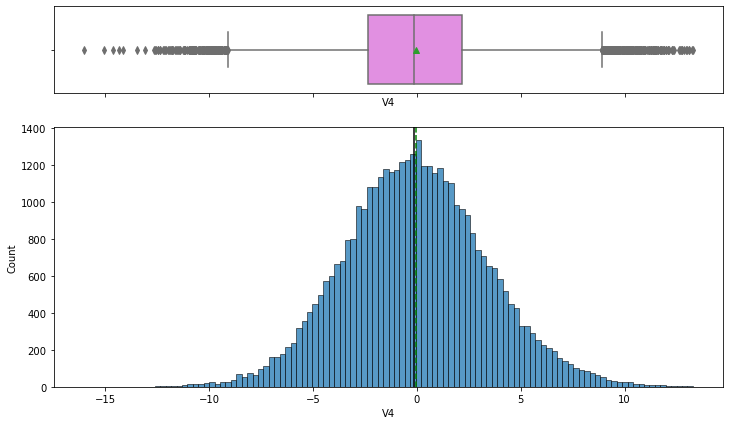

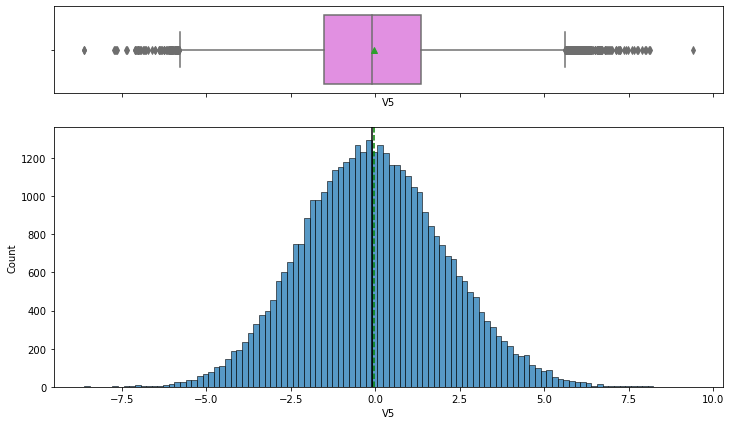

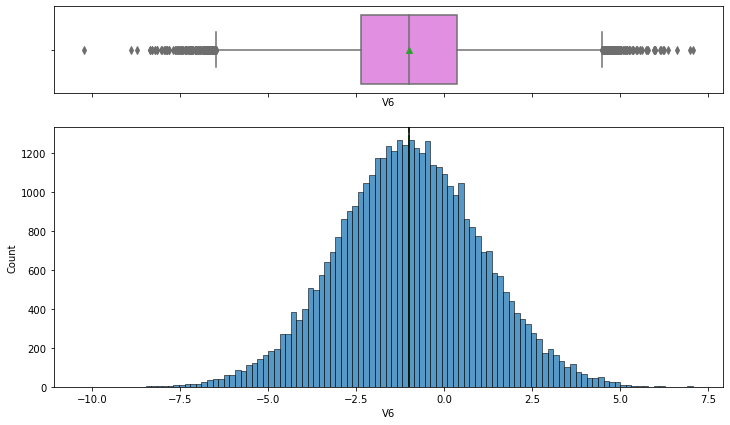

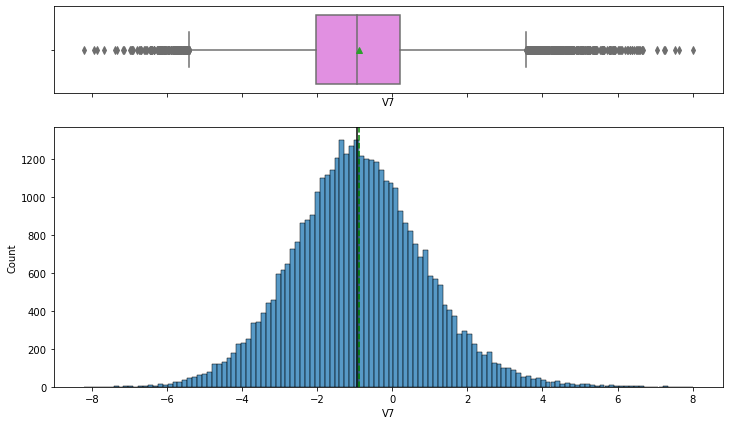

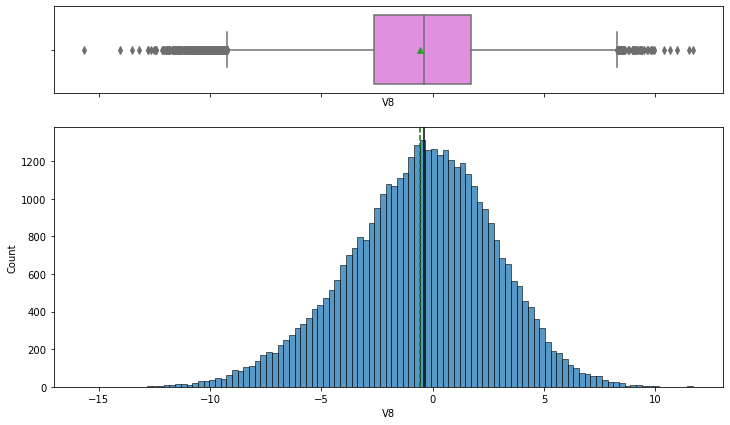

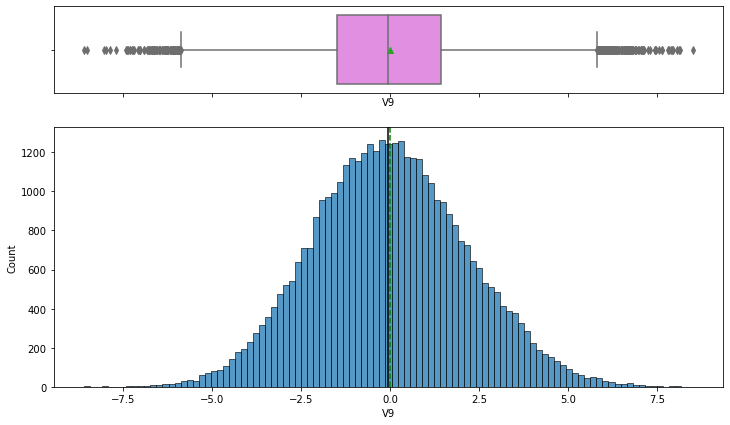

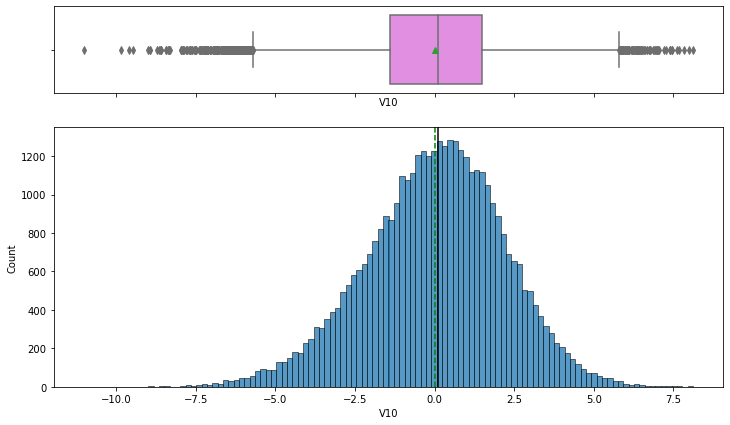

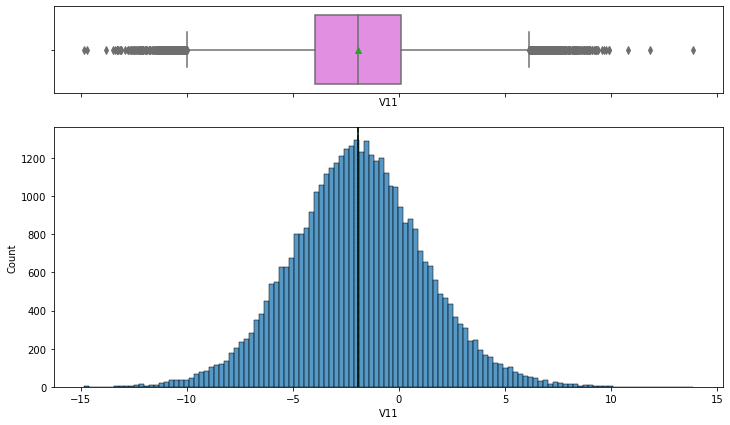

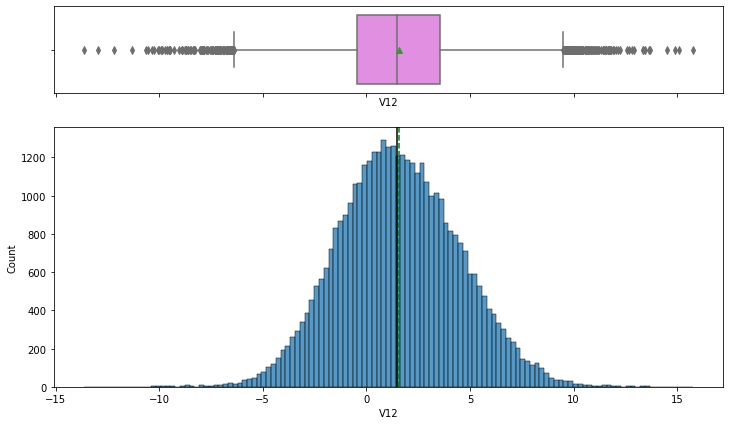

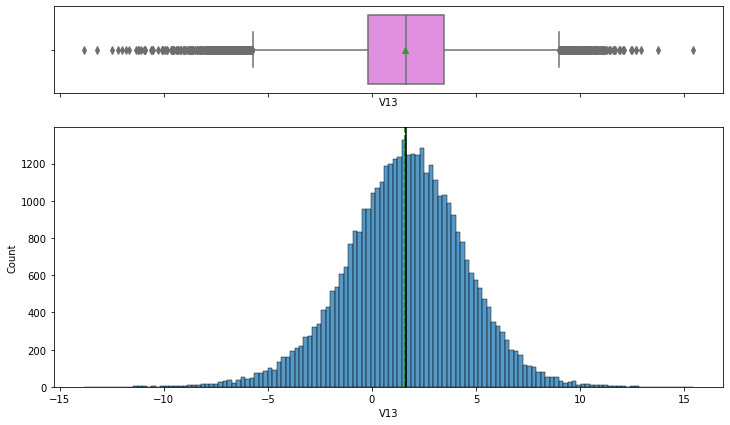

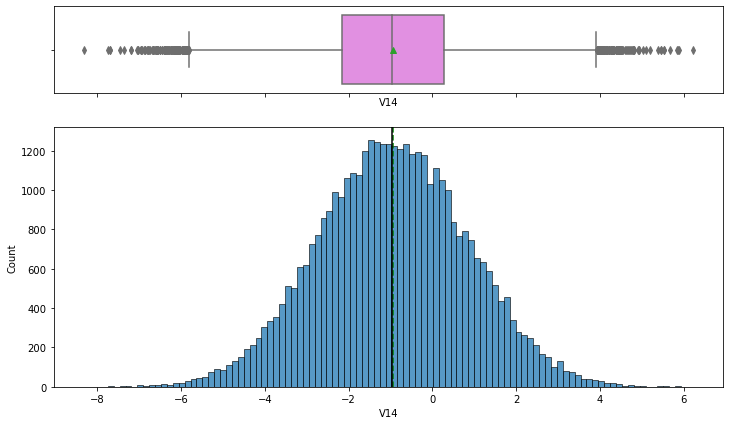

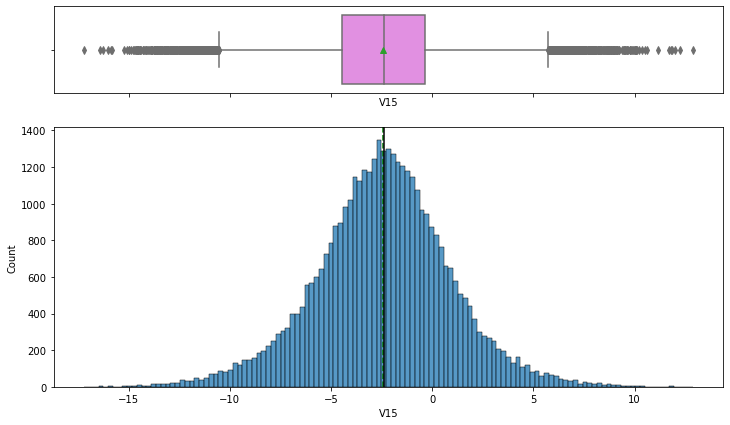

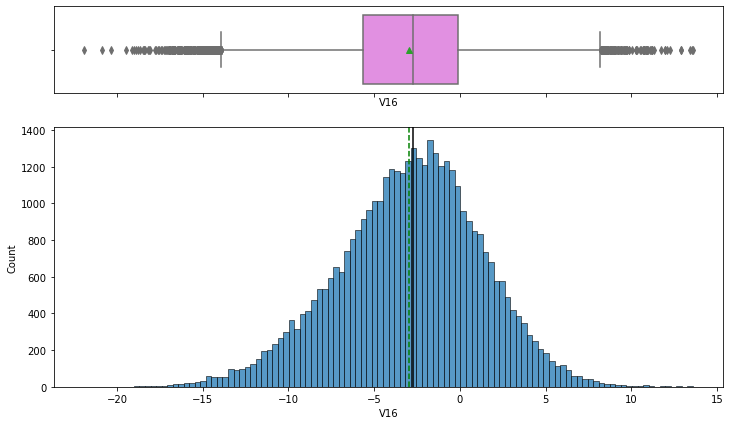

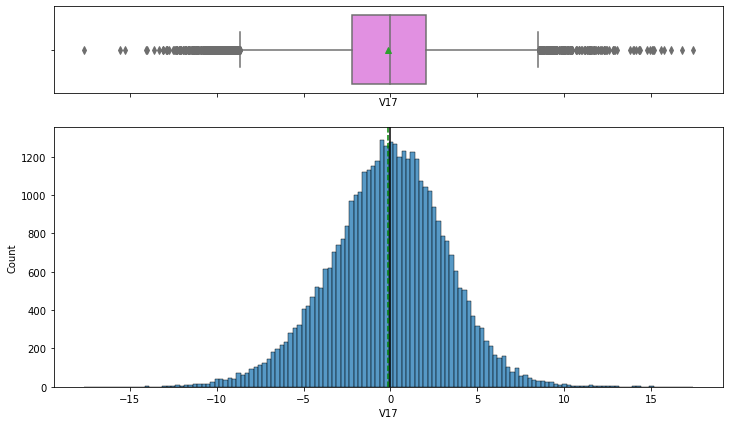

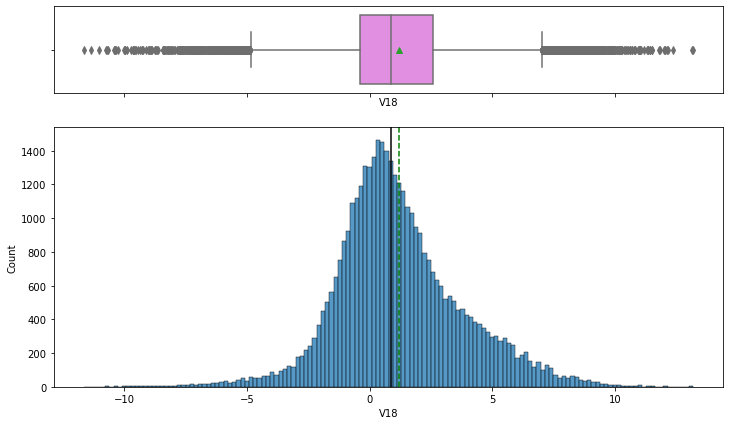

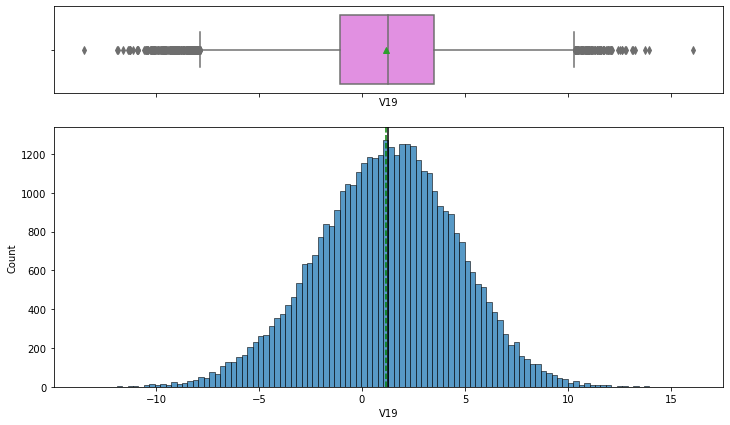

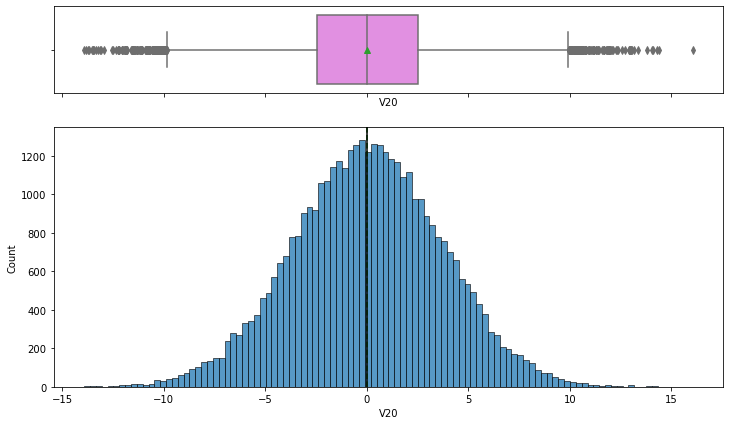

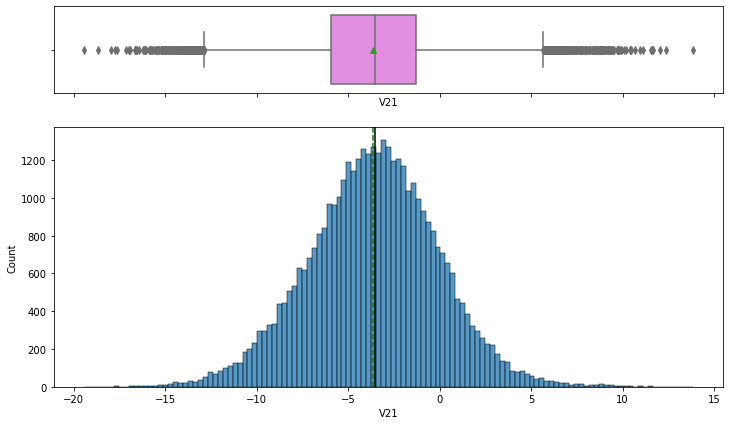

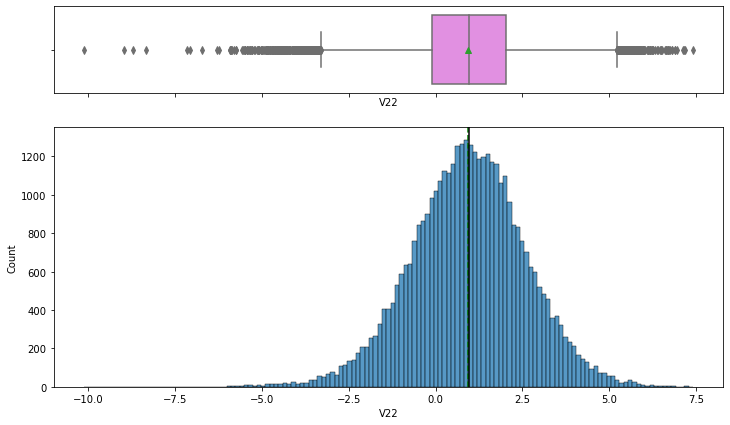

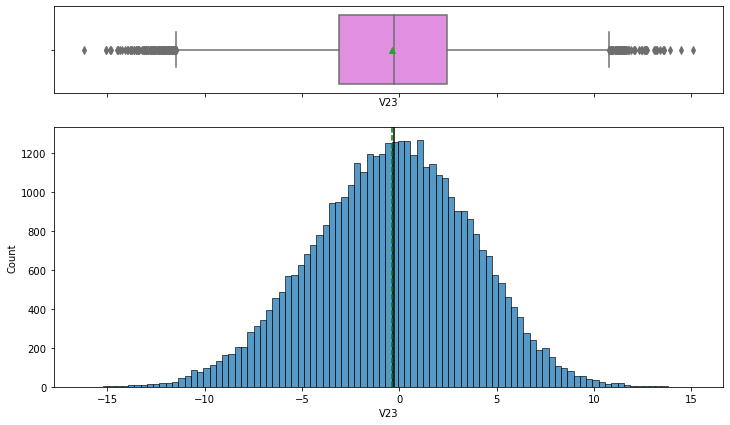

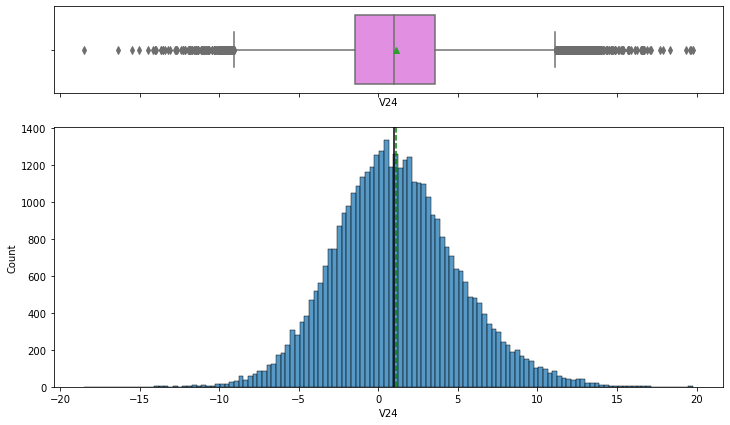

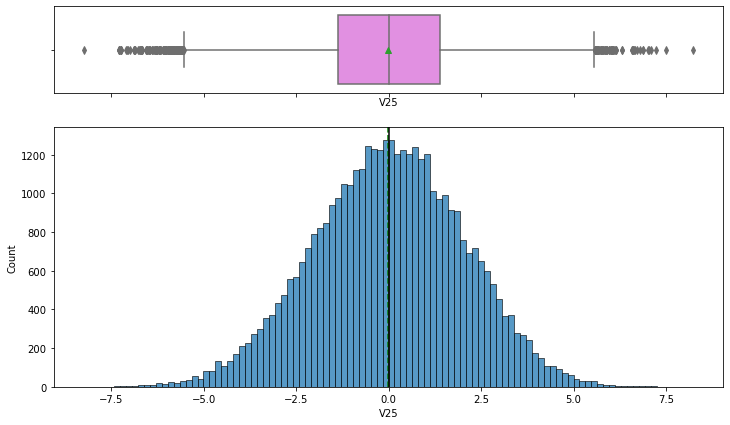

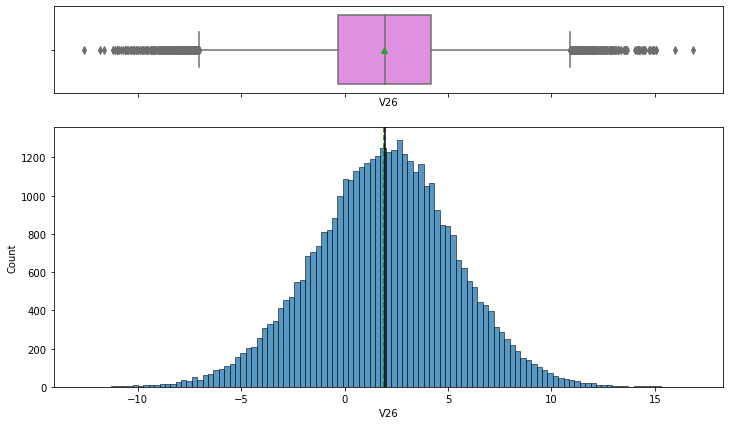

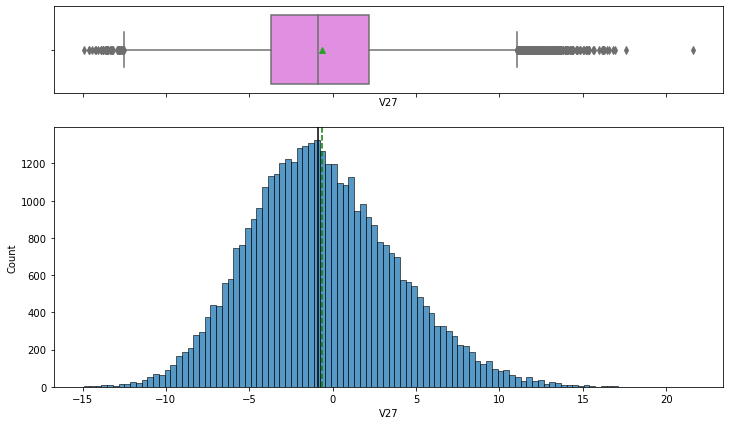

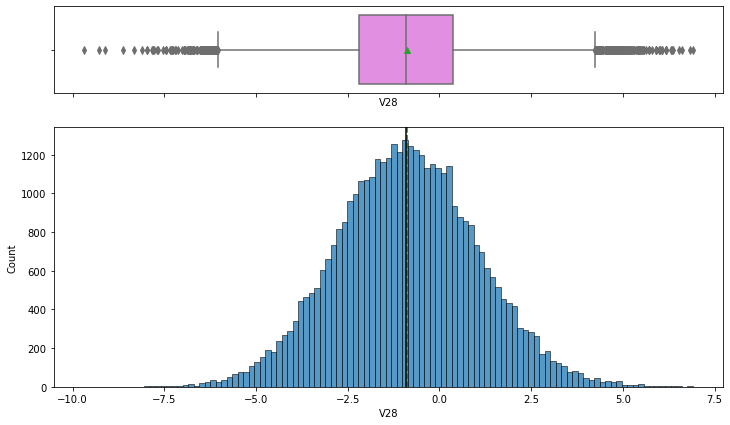

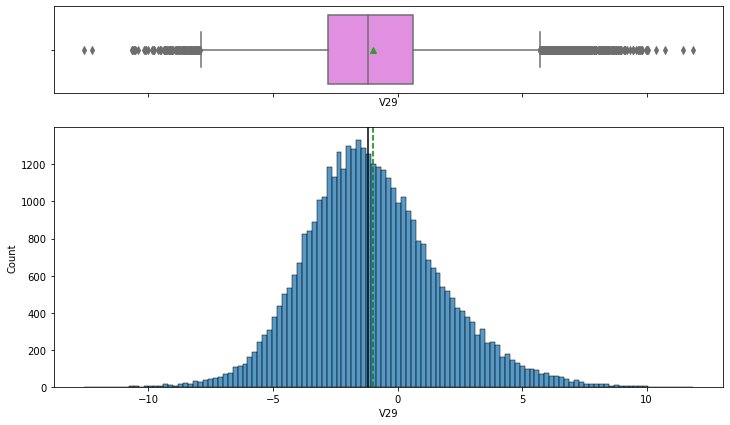

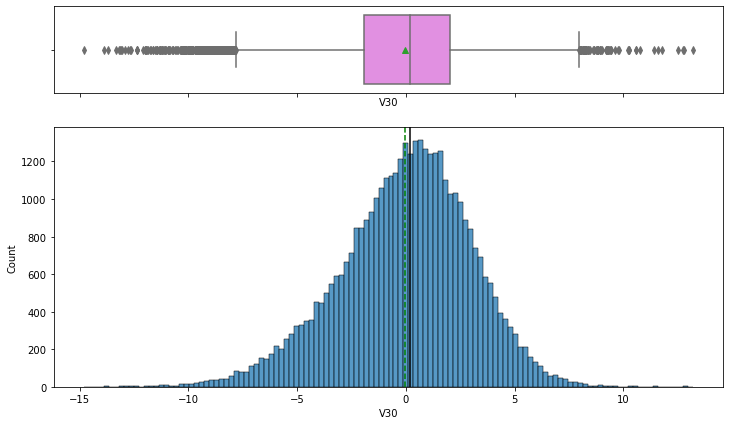

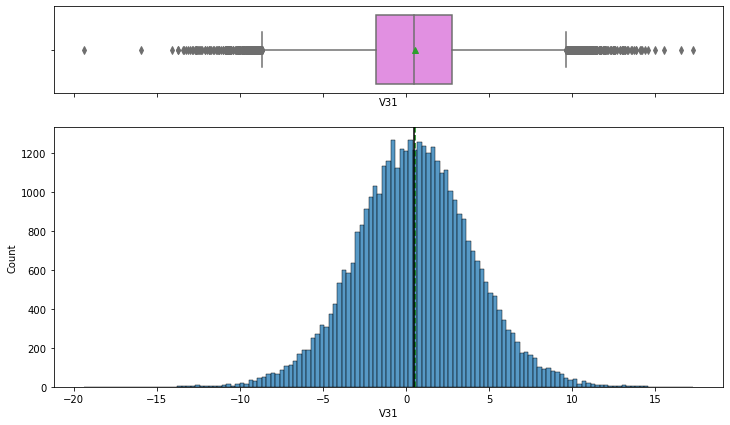

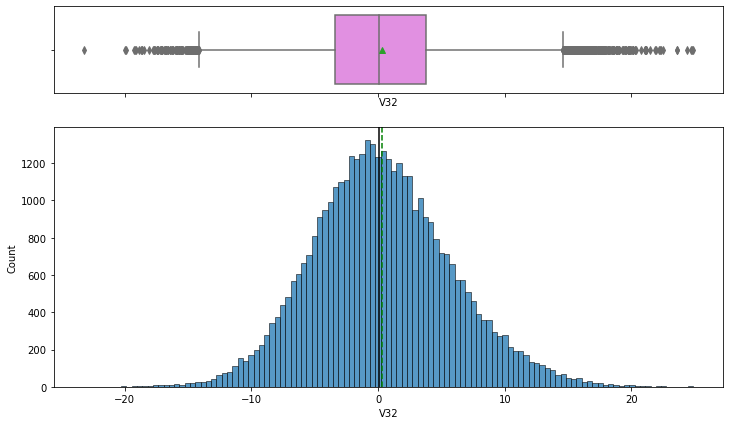

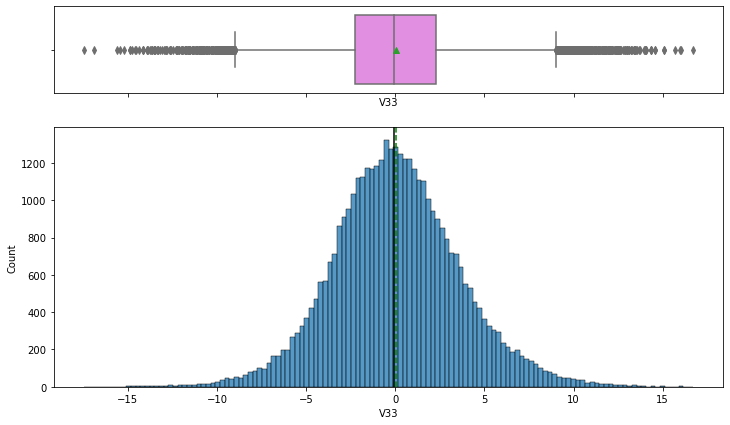

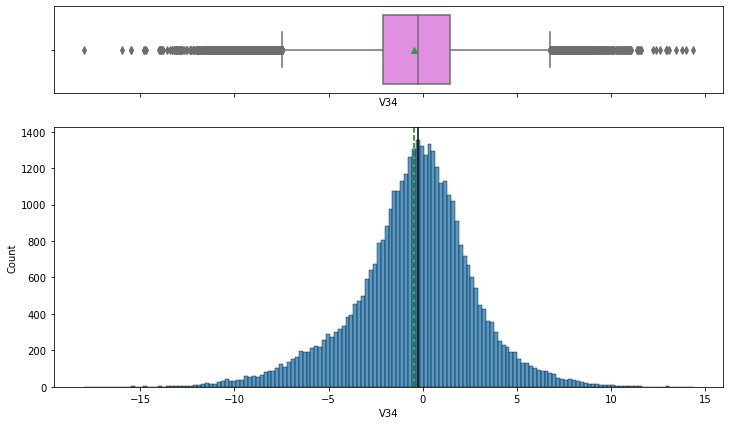

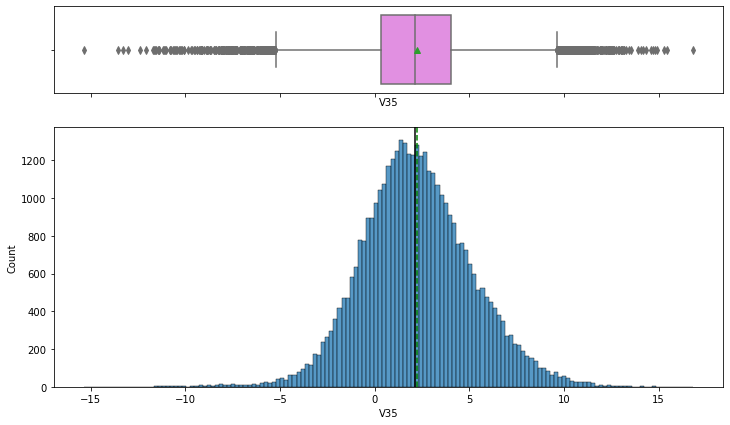

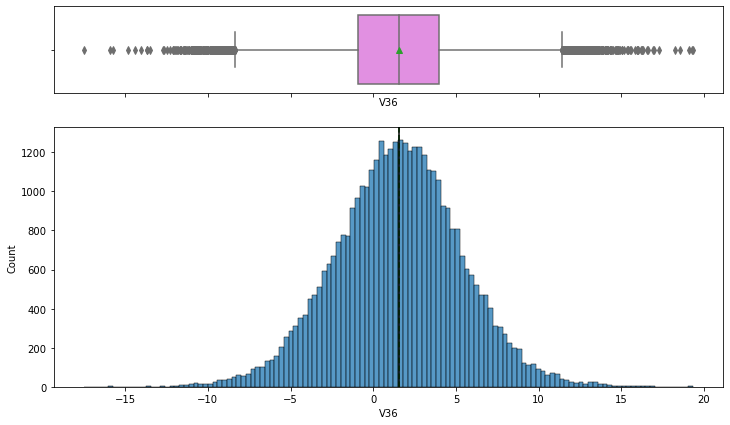

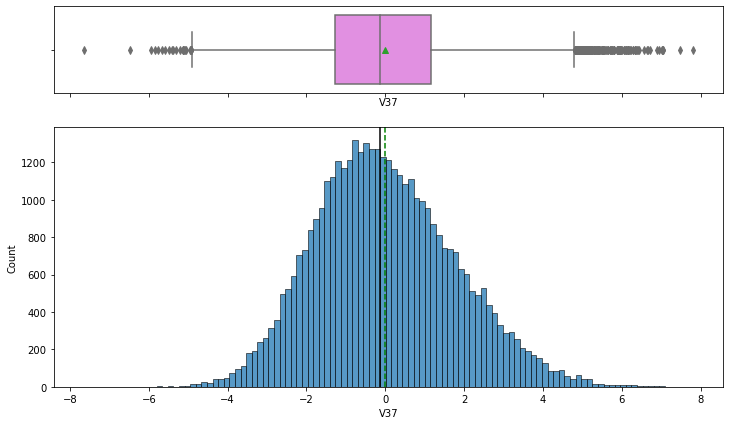

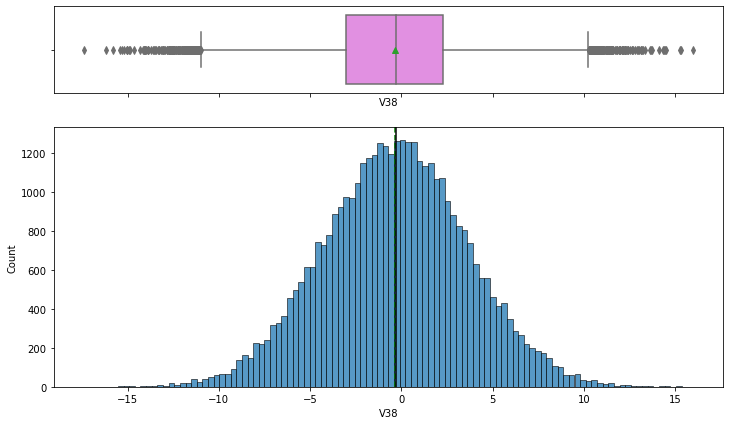

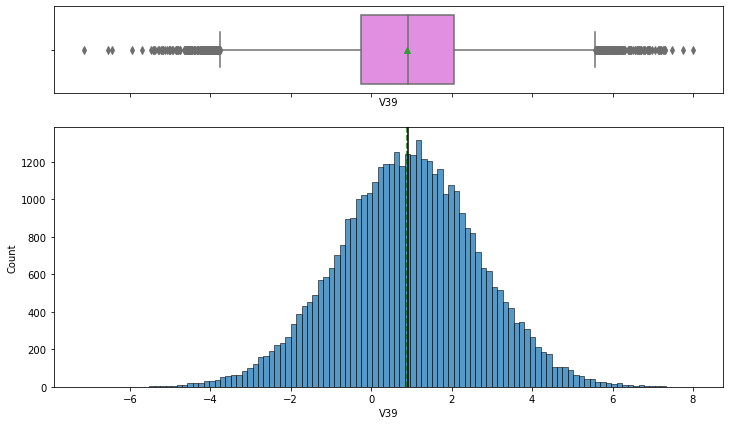

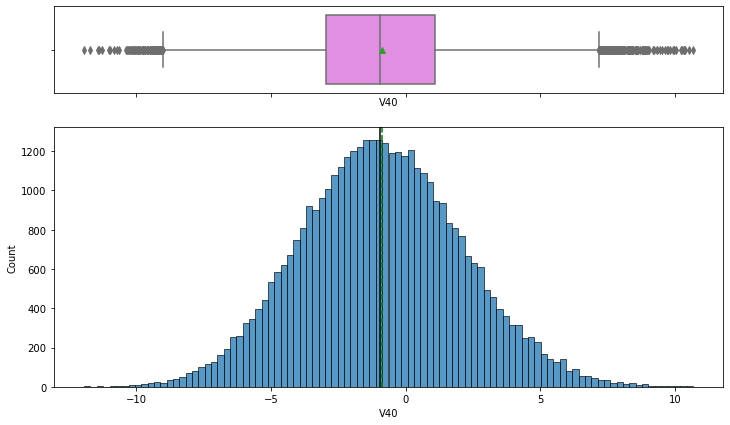

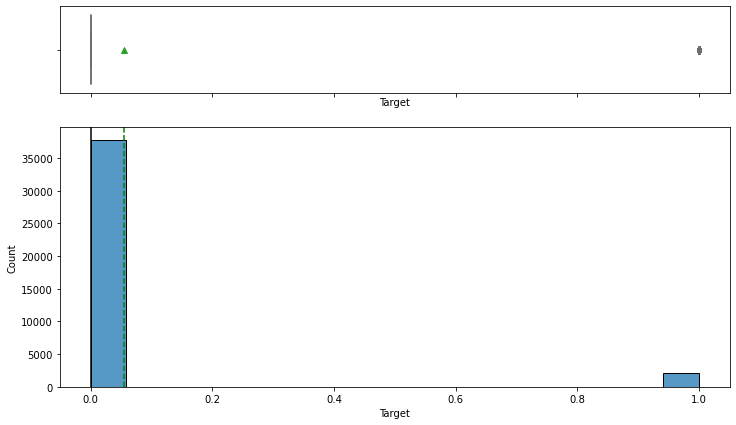

In [16]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

## OBSERVATIONS
-  Most of the variable distributions are fairly normal with symmetrical shapes
-  Most of the variables have their mean and median values close to each other with no wide variances
-  Most of the distributions have outliers
-  A few distributions are slightly right-skewed such as V1, V18, V27
-  A few distributions are slightly left-skewed such as V8. V10, V16
-  Target variable has over 90% (over 37,000) cases of No failure and only less than 10% (<3,000) cases of Failures


### Let's look at the values in target variable

In [17]:
data["Target"].value_counts(
    1
)  #  Checking the class distribution in target variable for train data

0   0.945
1   0.055
Name: Target, dtype: float64

94.5% of the data belongs to the "No Failure" class while 5.5% are the "Failure" class in the train data 

In [18]:
data_test["Target"].value_counts(
    1
)  #  Checking the class distribution in target variable for test data

0   0.945
1   0.055
Name: Target, dtype: float64

94.5% of the data belongs to the "No Failure" class while 5.5% are the "Failure" class in the train data

## Data Pre-Processing

In [19]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(
    ["Target"], axis=1
)  #  Dropping target variable from test data
y_test = data_test["Target"]  #  Storing target variable in y_test

In [20]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)  # Splitting the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


In [21]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 30000
Number of rows in validation data = 10000
Number of rows in test data = 10000


- Number of rows in train data = 30000
- Number of rows in validation data = 10000
- Number of rows in test data = 10000

They all have 40 columns each

In [22]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

We will use median to impute missing values in Income column.

In [23]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(
    imputer.transform(X_val), columns=X_val.columns
)  # To impute missing values in X_val

# Transform the test data
X_test = pd.DataFrame(
    imputer.transform(X_test), columns=X_test.columns
)  # To impute missing values in X_test

In [24]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

- No more missing values in any of the data sets
- All missing values have been treated

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [26]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [27]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [28]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.48292682926829267
Bagging: 0.7347560975609755
dtree: 0.7335365853658538
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8201219512195121

Validation Performance:

Logistic regression: 0.4625228519195612
Bagging: 0.7349177330895795
dtree: 0.7477148080438757
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521


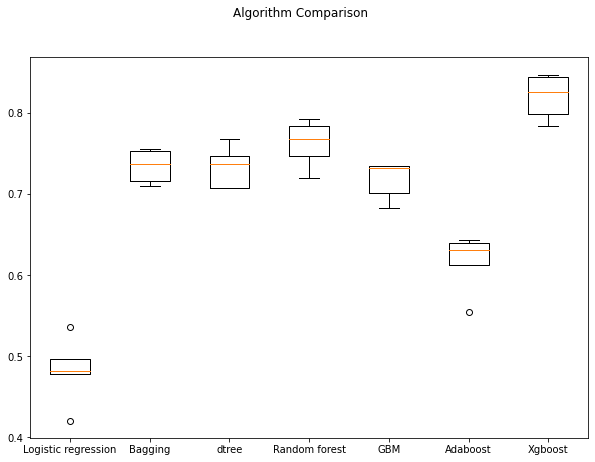

In [29]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Random forest, followed by decision tree and 4th in line is the Bagging classifier model.
- The boxplot shows that the performance of xgboost, Random forest and decision tree are consistent without any outliers. 
- The Performance of XGBoost and random forest are the highest on cross-validation.
- We will tune - XGBoost, Random forest, desision tree and Bagging classifier and see if the performance improves.

### Model Building with oversampled data

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



## Logistic Regression on oversampled data

In [31]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(
    X_train_over, y_train_over
)  # Building models on oversampled data


LogisticRegression(random_state=1)

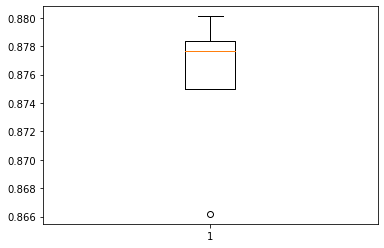

In [32]:
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  # Creating boxplot to check model performance on over sampled data

Recall performance of model on training set varies between 0.87 to 0.88, which is an improvement from the previous model

Let's check other metrics and then the performance on the validation set.

In [33]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.874,0.876,0.874,0.875


In [34]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.873,0.839,0.279,0.419


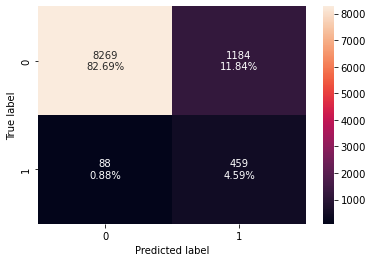

In [35]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

- We can see that the model with oversampled data has improved the train recall from 0.48 to 0.87 and 0.46 to 0.83 on the validation data.
- False Negatives on the Validation data is less than 1% of the data set.
- There is minimal overfitting in the recall results which can be reduced by regularization.
- Precision and F1 are heavily overfitting too but Accuracy is generalising well

## REGULARISATION
- We will be performing the regularisation using the Elastic net regularisation and the saga solver to reduce the overfittings in the logistic regression

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
%%time
# Choose the type of classifier.
lr_estimator = LogisticRegression(
    random_state=1, solver="saga"
)  # The Elastic-Net regularization combines the L1 and L2
# penalties of the lasso and ridge method

# Grid of parameters to choose from
parameters = {
    "C": np.arange(0.1, 1.1, 0.1)
}  # Inverse of regularization strength; must be a positive float.
# Smaller values specify stronger regularization.

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

CPU times: total: 1min 57s
Wall time: 1min 7s


LogisticRegression(C=0.1, random_state=1, solver='saga')

In [38]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.874,0.876,0.873,0.875


In [39]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.873,0.839,0.280,0.419


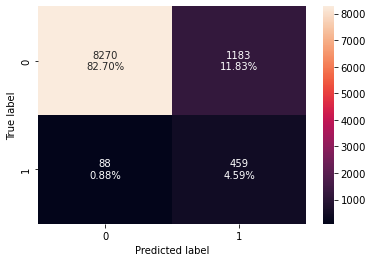

In [40]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

After regularisation, there is no significant difference or improvement in the model performances

### BAGGING CLASSIFIER ON OVERSAMPLED DATA

In [41]:
bag_over = BaggingClassifier(random_state=1)
# Training the basic BaggingClassifier model with training set
bag_over.fit(
    X_train_over, y_train_over
)  # Building models on oversampled data


BaggingClassifier(random_state=1)

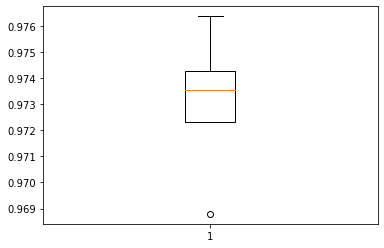

In [42]:
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(
    estimator=bag_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  

In [43]:
# Calculating different metrics on train set
bag_over_train_perf = model_performance_classification_sklearn(
    bag_over, X_train_over, y_train_over
)
print("Training performance:")
bag_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.998,1.000,0.999


In [44]:
# Calculating different metrics on validation set
bag_over_val_perf = model_performance_classification_sklearn(bag_over, X_val, y_val)
print("validation performance:")
bag_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.984,0.835,0.866,0.850


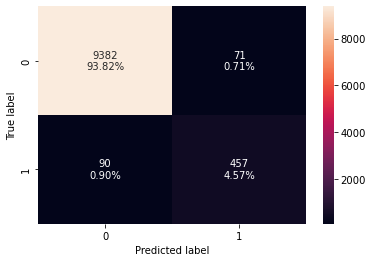

In [45]:
# creating confusion matrix
confusion_matrix_sklearn(bag_over, X_val, y_val)

- The Bagging Classifier model with oversampled shows that recall performance on the training set has improved but the model is not able to replicate the same for the validation set.
- Model is overfitting on recall.
- Accuracy is performing and generalising well, but Precision and F1 are also overfitting
- Confusion matrix shows that False Negatives on the validation data is less than 1% of data set. 

### DECISION TREE CLASSIFIER ON OVERSAMPLED DATA

In [46]:
dtree_over = DecisionTreeClassifier(random_state=1)
# Training the basic BaggingClassifier model with training set
dtree_over.fit(
    X_train_over, y_train_over
)  # Building models on oversampled data


DecisionTreeClassifier(random_state=1)

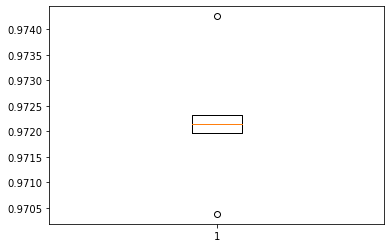

CPU times: total: 10.2 s
Wall time: 10.2 s


In [47]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(estimator=dtree_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  

In [48]:
# Calculating different metrics on train set
dtree_over_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [49]:
# Calculating different metrics on validation set
dtree_over_val_perf = model_performance_classification_sklearn(dtree_over, X_val, y_val)
print("validation performance:")
dtree_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.814,0.535,0.645


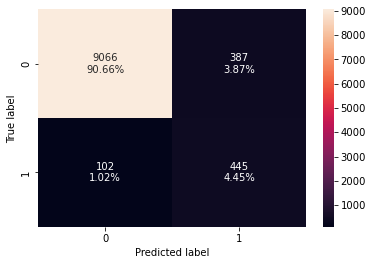

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_over, X_val, y_val)

- The Decision tree model with oversampled shows that recall performance on the training set has improved but the model is not able to replicate the same for the validation set.
- Hence, Model is overfitting on recall.
- Accuracy is performing and generalising well, but Precision and F1 are also overfitting
- Confusion matrix shows that False Negatives on the validation data is about 1.02% (102/10000) of data set.

### RANDOM FOREST CLASSIFIER ON OVERSAMPLED DATA

In [51]:
rf_over = RandomForestClassifier(random_state=1)
# Training the basic BaggingClassifier model with training set
rf_over.fit(
    X_train_over, y_train_over
)  # Building models on oversampled data


RandomForestClassifier(random_state=1)

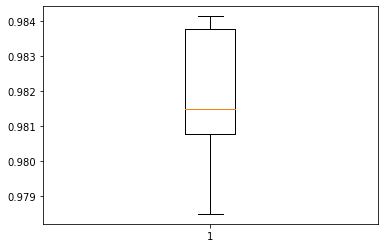

CPU times: total: 1min 18s
Wall time: 1min 18s


In [52]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(estimator=rf_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show() 

In [53]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [54]:
# Calculating different metrics on validation set
rf_over_val_perf = model_performance_classification_sklearn(rf_over, X_val, y_val)
print("validation performance:")
rf_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.991,0.868,0.962,0.913


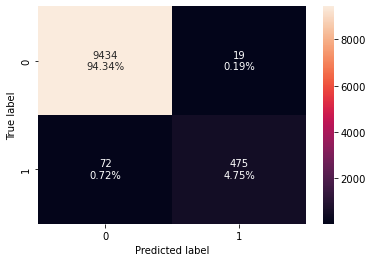

In [55]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over, X_val, y_val)

- The random forest model with oversampled shows an improvement in performance and is generalising well on all metrics except recall which is overfitting 
- Model is overfitting on recall.
- Confusion matrix shows that False Negatives on the validation data is at 0.72% of the data set.

## GRADIENT BOOSTING CLASSIFIER ON OVERSAMPLED DATA



In [56]:
gbm_over = GradientBoostingClassifier(random_state=1)
# Training the basic BaggingClassifier model with training set
gbm_over.fit(
    X_train_over, y_train_over
)  # Models on oversampled data


GradientBoostingClassifier(random_state=1)

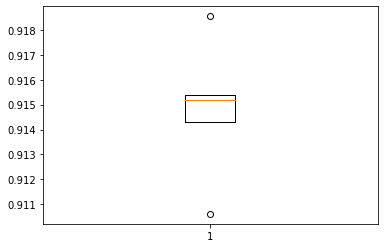

CPU times: total: 3min 21s
Wall time: 3min 21s


In [57]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(estimator=gbm_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  # Boxplot to check model performance on over sampled data

In [58]:
# Calculating different metrics on train set
gbm_over_train_perf = model_performance_classification_sklearn(
    gbm_over, X_train_over, y_train_over
)
print("Training performance:")
gbm_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944,0.914,0.971,0.942


In [59]:
# Calculating different metrics on validation set
gbm_over_val_perf = model_performance_classification_sklearn(gbm_over, X_val, y_val)
print("validation performance:")
gbm_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.881,0.636,0.739


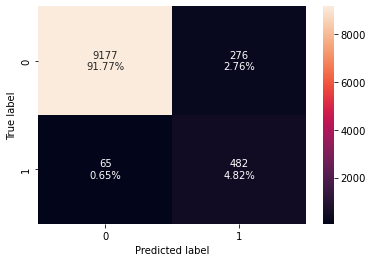

In [60]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_over, X_val, y_val)

- The Gradient Boosting classifier model with oversampled shows that recall performance on the training set has improved as well as validation set.
- Model is generalising fairly on recall with very minimal overfitting.
- Accuracy is performing and generalising well, but Precision and F1 are overfitting
- Confusion matrix shows that False Negatives on the validation data is 0.65% of the data set.

## ADABOOST CLASSIFIER ON OVERSAMPLED DATA


In [61]:
%%time
adb_over = AdaBoostClassifier(random_state=1)
# Training the basic BaggingClassifier model with training set
adb_over.fit(X_train_over, y_train_over)  # Models on oversampled data


CPU times: total: 10.2 s
Wall time: 10.3 s


AdaBoostClassifier(random_state=1)

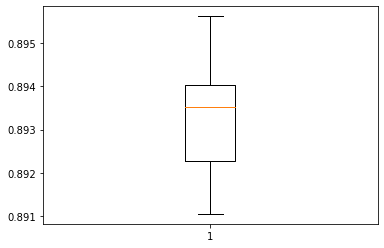

CPU times: total: 40.5 s
Wall time: 40.6 s


In [62]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(estimator=adb_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  # Creating boxplot to check model performance on over sampled data

In [63]:
# Calculating different metrics on train set
adb_over_train_perf = model_performance_classification_sklearn(
    adb_over, X_train_over, y_train_over
)
print("Training performance:")
adb_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.905,0.894,0.914,0.904


In [64]:
# Calculating different metrics on validation set
adb_over_val_perf = model_performance_classification_sklearn(adb_over, X_val, y_val)
print("validation performance:")
adb_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.905,0.850,0.350,0.496


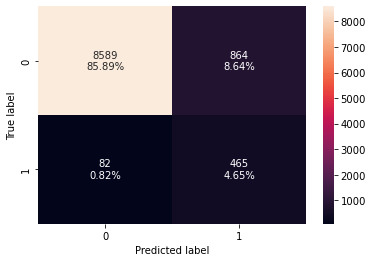

In [65]:
# creating confusion matrix
confusion_matrix_sklearn(adb_over, X_val, y_val)

- AdaBoost Classifier with oversampled shows a very good improvement on recall performance on the training set and the model is  able to replicate the same for the validation set.
- Model is not overfitting on recall.
- Accuracy is also performing and generalising very well, but Precision and F1 are overfitting
- Confusion matrix shows that False Negatives on the validation data is about 0.82% (82/10000) of data set.

## XGBOOST CLASSIFIER ON OVERSAMPLED DATA


In [66]:
%%time
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
# Training the basic BaggingClassifier model with training set
xgb_over.fit(X_train_over, y_train_over)  # Building models on oversampled data


CPU times: total: 4.05 s
Wall time: 366 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

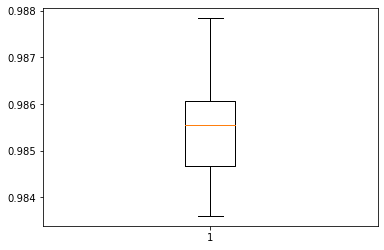

CPU times: total: 19.2 s
Wall time: 1.72 s


In [67]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(estimator=xgb_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()  # Boxplot to check model performance on over sampled data

In [68]:
# Calculating different metrics on train set
xgb_over_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.998,0.999,0.999


In [69]:
# Calculating different metrics on validation set
xgb_over_val_perf = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("validation performance:")
xgb_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.876,0.907,0.891


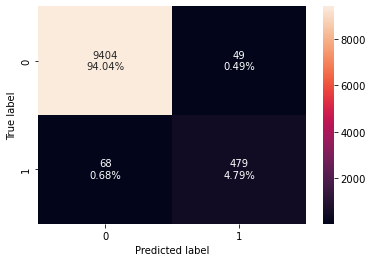

In [70]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_over, X_val, y_val)

- The XGBoost Classifier with oversampled data shows that recall performance on the training and validation sets have improved 
- Model is generalising fairly with minimal overfitting on recall.
- Accuracy, Precision and F1 have all also shown significant improvements in performance and are all generalising well with no overfitting
- Confusion matrix shows that False Negatives on the validation data is 0.66% of data set.

### Model Building with undersampled data

In [71]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1640
Before UnderSampling, counts of label '0': 28360 

After UnderSampling, counts of label '1': 1640
After UnderSampling, counts of label '0': 1640 

After UnderSampling, the shape of train_X: (3280, 40)
After UnderSampling, the shape of train_y: (3280,) 



## Logistic Regression on undersampled data

In [72]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(
    X_train_un, y_train_un
)  # Build models on undersampled data


LogisticRegression(random_state=1)

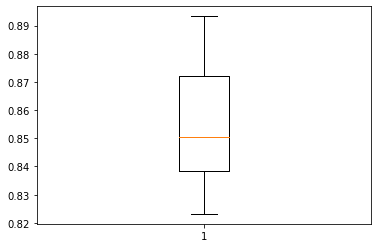

In [73]:
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Creating boxplot to check model performance on under sampled data

In [74]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.859,0.855,0.862,0.859


In [75]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.864,0.846,0.266,0.405


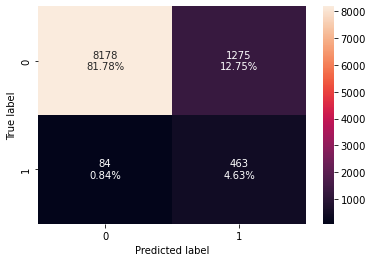

In [76]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

- Model has given a generalized performance on training and validation set.
- Model performance is better on oversampled data than using undersampling 
- Logistic regression with undersampled data is able to differentiate well between positive and negative classes.
- False Negatives on the validation data is 0.84% of data set.

## Bagging classifier on undersampled data

In [77]:
bag_under = BaggingClassifier(random_state=1)
bag_under.fit(
    X_train_un, y_train_un
)  # Build models on undersampled data


BaggingClassifier(random_state=1)

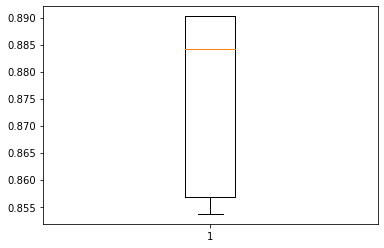

In [78]:
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(
    estimator=bag_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [79]:
# Calculating different metrics on train set
bag_under_train_perf = model_performance_classification_sklearn(
    bag_under, X_train_un, y_train_un
)
print("Training performance:")
bag_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.980,0.998,0.989


In [80]:
# Calculating different metrics on validation set
bag_under_val_perf = model_performance_classification_sklearn(bag_under, X_val, y_val)
print("Validation performance:")
bag_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.863,0.529,0.656


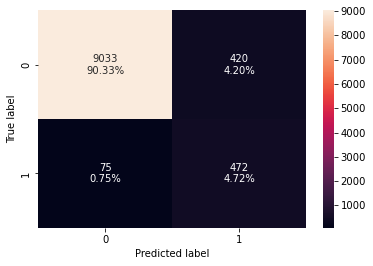

In [81]:
# creating confusion matrix
confusion_matrix_sklearn(bag_under, X_val, y_val)

- The Bagging Classifier model with undersampled shows that recall performance on the training set has improved and is generalising better on the validation set.
- Model is only fairly overfitting on recall.
- Accuracy is performing and generalising well, but Precision and F1 are overfitting
- Confusion matrix shows an improvement in identification of False Negatives on the validation data from 0.9% misclassification on oversampled data to 0.75% in undersampled data.

### DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA


In [82]:
dtree_under = DecisionTreeClassifier(random_state=1)
dtree_under.fit(
    X_train_un, y_train_un
)  # To build models on undersampled data


DecisionTreeClassifier(random_state=1)

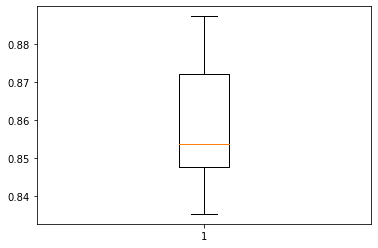

CPU times: total: 375 ms
Wall time: 375 ms


In [83]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(estimator=dtree_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [84]:
# Calculating different metrics on train set
dtree_under_train_perf = model_performance_classification_sklearn(
    dtree_under, X_train_un, y_train_un
)
print("Training performance:")
dtree_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [85]:
# Calculating different metrics on validation set
dtree_under_val_perf = model_performance_classification_sklearn(
    dtree_under, X_val, y_val
)
print("Validation performance:")
dtree_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.866,0.854,0.271,0.411


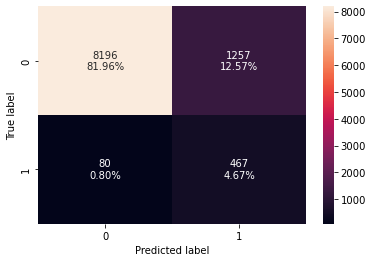

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_under, X_val, y_val)

- The Decision tree model with undersampled shows just a very slight rather insignificant improvement on the recall performance on the validation set.
- The model is slightly overfitting on recall.
- Accuracy, Precision and F1 had better performances in the oversampled data and are all overfitting
- Confusion matrix shows that model is better at identifying Positive and Negative classes with False Negatives on the validation data being 0.8% of the data set.

### RANDOM FOREST CLASSIFIER ON UNDERSAMPLED DATA


In [87]:
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(
    X_train_un, y_train_un
)  # Models on undersampled data


RandomForestClassifier(random_state=1)

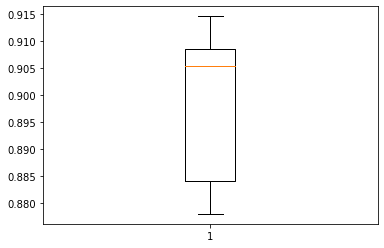

CPU times: total: 3.08 s
Wall time: 3.08 s


In [88]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(estimator=rf_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [89]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [90]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(rf_under, X_val, y_val)
print("Validation performance:")
rf_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.885,0.639,0.742


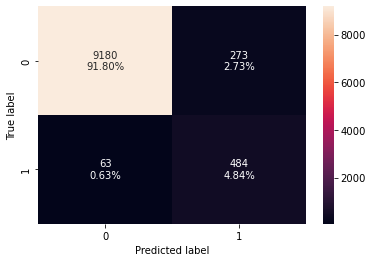

In [91]:
# creating confusion matrix
confusion_matrix_sklearn(rf_under, X_val, y_val)

- There is no significance difference in Recall score between the undersampled and oversampled random forest models 
- Model shows slight overfitting on recall.
- Accuracy, Precision and F1 have better performances in the oversampled data
- Confusion matrix shows that False Negatives on the validation data is at 0.63% of the data set.

### GRADIENT BOOSTING CLASSIFIER ON UNDERSAMPLED DATA


In [92]:
gbm_under = GradientBoostingClassifier(random_state=1)
gbm_under.fit(
    X_train_un, y_train_un
)  # Models on undersampled data


GradientBoostingClassifier(random_state=1)

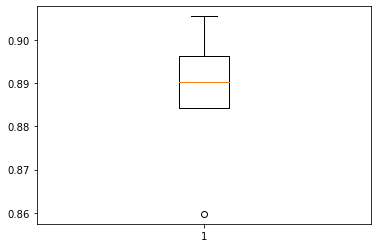

CPU times: total: 8.75 s
Wall time: 8.75 s


In [93]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(estimator=gbm_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [94]:
# Calculating different metrics on train set
gbm_under_train_perf = model_performance_classification_sklearn(
    gbm_under, X_train_un, y_train_un
)
print("Training performance:")
gbm_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.952,0.918,0.985,0.950


In [95]:
# Calculating different metrics on validation set
gbm_under_val_perf = model_performance_classification_sklearn(gbm_under, X_val, y_val)
print("Validation performance:")
gbm_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.888,0.533,0.666


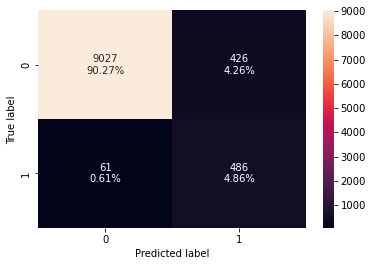

In [96]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_under, X_val, y_val)

- There is no significance difference in Recall score between the undersampled and oversampled Gradient Boost models
- Model is generalising well with no overfitting on recall.
- Accuracy, Precision and F1 have better performances in the oversampled data
- Confusion matrix shows that False Negatives on the validation data is at 0.61% of the data set.

### ADABOOST CLASSIFIER ON UNDERSAMPLED DATA


In [97]:
%%time
adb_under = AdaBoostClassifier(random_state=1)
adb_under.fit(X_train_un, y_train_un)  # Build models on undersampled data


CPU times: total: 469 ms
Wall time: 454 ms


AdaBoostClassifier(random_state=1)

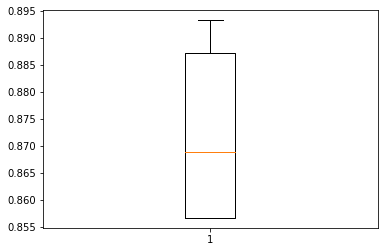

CPU times: total: 2.02 s
Wall time: 2.01 s


In [98]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(estimator=adb_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [99]:
# Calculating different metrics on train set
adb_under_train_perf = model_performance_classification_sklearn(
    adb_under, X_train_un, y_train_un
)
print("Training performance:")
adb_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.906,0.894,0.916,0.905


In [100]:
# Calculating different metrics on validation set
adb_under_val_perf = model_performance_classification_sklearn(adb_under, X_val, y_val)
print("Validation performance:")
adb_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.880,0.865,0.295,0.440


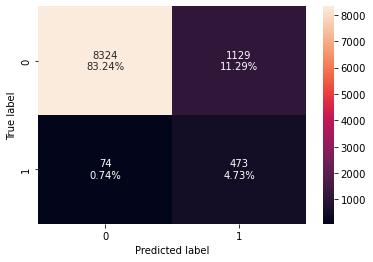

In [101]:
# creating confusion matrix
confusion_matrix_sklearn(adb_under, X_val, y_val)

- There is no significance difference in Recall score between the undersampled and oversampled Gradient Boost models
- Model is generalising well with no overfitting on recall.
- Accuracy, Precision and F1 have better performances in the oversampled data
- Confusion matrix however shows that the AdaBoost on undersampled data is doing better at identifying the Positive and Negative classes with False Negatives on the validation data at 0.74% as against 0.82% in the oversampled the data set.

### XGBOOST CLASSIFIER ON UNDERSAMPLED DATA


In [102]:
%%time
xgb_under = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_under.fit(X_train_un, y_train_un)  #Build XGBoost model on undersampled data


CPU times: total: 1.38 s
Wall time: 168 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

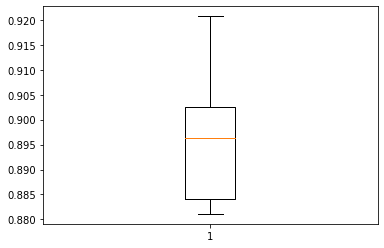

CPU times: total: 7.72 s
Wall time: 699 ms


In [103]:
%%time
# Plotting boxplots for CV scores of all models defined above
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

cv_result_under = cross_val_score(estimator=xgb_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()  # Boxplot to check model performance on under sampled data

In [104]:
# Calculating different metrics on train set
xgb_under_train_perf = model_performance_classification_sklearn(
    xgb_under, X_train_un, y_train_un
)
print("Training performance:")
xgb_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [105]:
# Calculating different metrics on validation set
xgb_under_val_perf = model_performance_classification_sklearn(xgb_under, X_val, y_val)
print("Validation performance:")
xgb_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.896,0.635,0.743


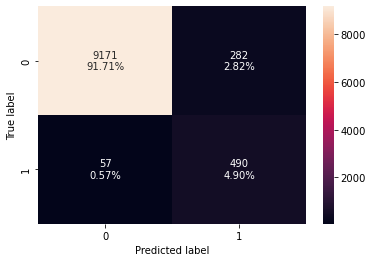

In [106]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_under, X_val, y_val)

- There is no significance difference in Recall score between the undersampled and oversampled Gradient Boost models
- Model is generalising fairly with minimal overfitting on recall.
- Accuracy, Precision and F1 have better performances in the oversampled data
- Confusion matrix shows that False Negatives on the validation data is at 0.54% of the data set.

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### Tuning Bagging classifier using oversampled data

In [107]:
%%time 

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) # To fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
CPU times: total: 2.56 s
Wall time: 10min 27s


In [108]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.9, random_state=1, max_samples=0.9, n_estimators=50
)

tuned_bag2.fit(
    X_train_over, y_train_over
)  # To fit the model on over sampled data

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [109]:
bag2_train_perf = model_performance_classification_sklearn(
    tuned_bag2, X_train_over, y_train_over
)
bag2_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [110]:
bag2_val_perf = model_performance_classification_sklearn(
    tuned_bag2, X_val, y_val
)  # Checking the performance on validation set
bag2_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.848,0.884,0.866


### Tuning Random forest using oversampled data

In [111]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) # To fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:
CPU times: total: 37.1 s
Wall time: 8min 2s


In [112]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_rf2.fit(
    X_train_over, y_train_over
)  # Fitting the model on over sampled data

RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=250, random_state=1)

In [113]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)  # Checking the performance on oversampled train set
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.999,0.998,1.000,0.999


In [114]:
rf2_val_perf = model_performance_classification_sklearn(
    tuned_rf2, X_val, y_val
)  # To check the performance on validation set
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.991,0.872,0.950,0.909


### Tuning Gradient Boosting using oversampled data

In [115]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9584273624823695:
CPU times: total: 32 s
Wall time: 5min 19s


In [117]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features="sqrt", random_state=1, n_estimators=250, min_samples_leaf=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features='sqrt', n_estimators=250,
                           random_state=1)

In [118]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.954,0.926,0.981,0.953


In [119]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.883,0.713,0.789


### Tuning XGBoost using oversampled data

In [120]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) # Fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9965796897038082:
CPU times: total: 11.3 s
Wall time: 2min 3s


In [121]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
)

xgb2.fit(
    X_train_over, y_train_over
)  # To fit the model on over sampled data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [122]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)  # To check the performance on oversampled train set
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.992,1.000,0.984,0.992


In [123]:
xgb2_val_perf = model_performance_classification_sklearn(
    xgb2, X_val, y_val
)  # To check the performance on validation set
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.972,0.905,0.685,0.780


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [gbm_train_perf.T, xgb2_train_perf.T, bag2_train_perf.T, rf2_train_perf.T,], axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Bagging classifier tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.954,0.992,1.000,0.999
Recall,0.926,1.000,1.000,0.998
Precision,0.981,0.984,1.000,1.000
F1,0.953,0.992,1.000,0.999


In [125]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [gbm_val_perf.T, xgb2_val_perf.T, bag2_val_perf.T, rf2_val_perf.T,], axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df  # Compare the performance on validation set

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Bagging classifier tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.974,0.972,0.986,0.991
Recall,0.883,0.905,0.848,0.872
Precision,0.713,0.685,0.884,0.950
F1,0.789,0.780,0.866,0.909


- The xgboost model tuned with oversampled data is giving the best validation recall of 0.905. The model is also seen to give good performances on Accuracy, Precision and F1.
- XGBoost tuned with oversampled data is our final model.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model.

**Now we have our final model, so let's find out how our model is performing on unseen test data.**

In [126]:
# Checking the performance of best model on test data


# Calculating different metrics on the test set
xgboost_tuned_test = model_performance_classification_sklearn(xgb2, X_test, y_test)
print("Test performance:")
xgboost_tuned_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.965,0.881,0.628,0.734


The recall performance on test data is generalised

### Feature Importances

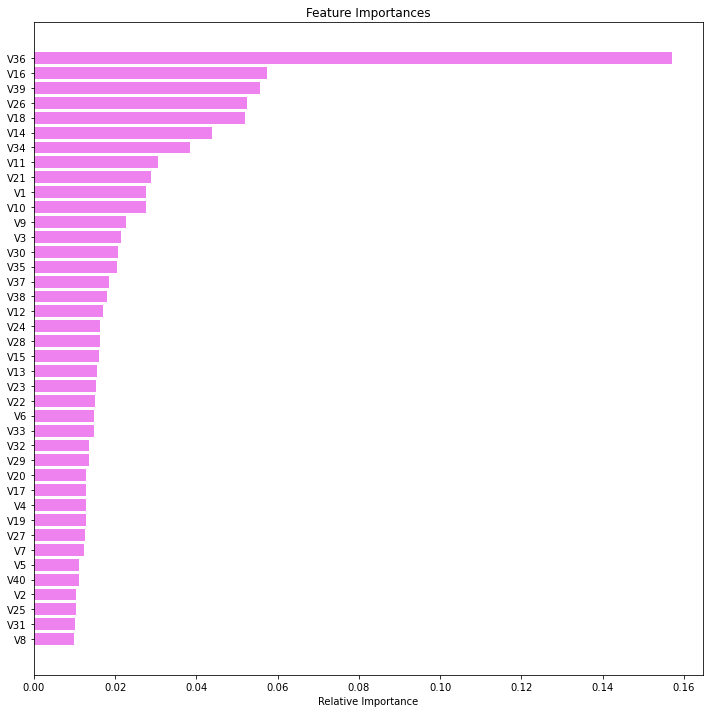

In [127]:
feature_names = X_train.columns
importances = (
    xgb2.feature_importances_
)  # Checking the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

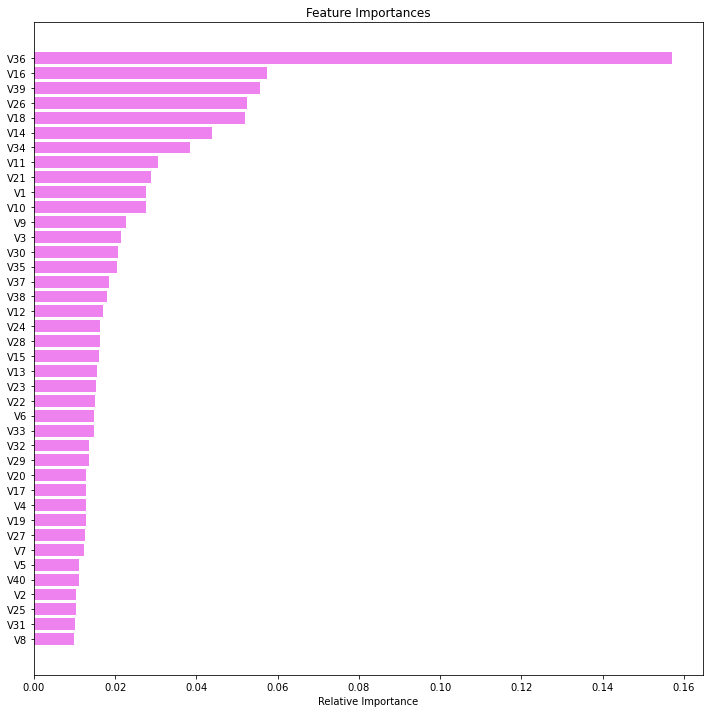

In [128]:
feature_names = X_train_over.columns
importances = (
    xgb2.feature_importances_
)  # To check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

V36 is the most important feature followed by V16 then V39. V26 and V18 come in next in a tie.

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [129]:
Model = Pipeline(
    steps=[
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=250,
                learning_rate=0.1,
                gamma=5,
            ),
        ),
    ]
)  # Creating pipeline for the best model
model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [130]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target") #  Drop target variable from test data
y_test1 = df_test["Target"] #  Store target variable in y_test1


In [131]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X_test1 = imputer.transform(
    X_test1
)  # To treat the missing values in the test set

In [132]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [133]:
Model.fit(X1, Y1)  #  Fitting the Model obtained from above step

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=250,

In [134]:
Model.fit(X_over1, y_over1)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=250,

In [135]:
Model_test = model_performance_classification_sklearn(Model, X_test1, y_test1)
Model_test  # To make predictions on the test data using the productionized Model

,Accuracy,Recall,Precision,F1
0,0.964,0.883,0.618,0.727


This is the performance to make predictions on the test data using the productionized Model


### Productionisation of the final model using pipelines
- Pipeline was used to put the model into production
- 1 pipeline was created for all the columns since there is only one data type in the data set, hence, column transformer was not used
- Missing value imputation was done as pre-processing
- Missing value imputation was also done for the whole data, so that if there is any missing value in the data in the future, that can be taken care of
- The best model (XGB classifier) parameters was used to create the pipeline


# Executive Summary, Business Insights and Conclusions


- This project analyzed the use of a predictive model to achieve operational efficiency  such that failure patterns in energy generating machines are predictable and if the component failure can be predicted accurately and the component is replaced before it fails, the cost of operations and maintenance will be much lower.
- The final best model built can be used to predict if a generator will be having a failure or not, and in essence, identify generators before they break down.
- 7 models were built on original data set namely Logistics regression, Decision Tree, Random Forest, Bagging Classifier Ada Boost, Gradient Boost and XGBoost. 8 Models were built on oversampled data and - 7 samples were built on undersampled data.
- All the models were compared for best performance and generalisation maximising the Recall score as performance metric of utmost importance because we are trying to minimise False Negatives.
- The 4 best performing models were chosen to be hyperparameter tuned and the final best model was identified which was used to build a pipeline to put the final model into production.
- The XGBoost model tuned with undersampled data is the best model and it can be used to predict generator failures which will help identify failing generators so that they can be repaired before breaking down.
- This will reduce the overall maintenance cost.
- The model predictive performance is good with a Recall score of 0.887 and Accuracy score of  0.969. It is able to properly predict the Positive and Negative classes
- True Positives (TP) are failures correctly predicted by the model. These will result in repair costs = <span>&dollar;</span>15,000 
- False Negatives (FN) are real failures in a generator where there is no detection by model. These will result in replacement costs = <span>&dollar;</span>40,000
- False positives (FP) are failure detections in a generator where there is no failure. These  will result in inspection costs = <span>&dollar;</span>5,000
- It is best to keep these costs at the best minimum.
- Features V36 and V16 are the most important features that are responsible for the performance of the generators. 
- We advise that features V36, V16, V39, V26 and V18 be closely monitored as they are very important features that determine the failure or not of the generator machines.
- There are less Failures (<10%) recorded in the data set and more than 90% cases of No Failure
